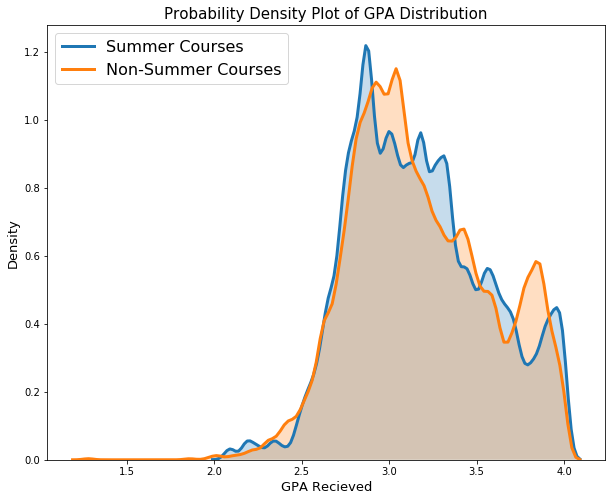

In [33]:
from analysis_modules import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig=plt.figure(figsize=(10, 8))
dtf = make_pandas('ucsd.txt')
terms = ['S', 'NS']
for term in terms:
    sub = dtf[dtf['Summer?'] == term]
    if term == 'S':
        temp = 'Summer Courses'
    else:
        temp = 'Non-Summer Courses'
    
    sns.distplot(sub['GPA Recieved'], hist = False, norm_hist = True,
               kde_kws = {'shade':True, 'linewidth':3, 'bw': 0.03},
               label = temp)

plt.legend(prop={'size': 16})
plt.title('Probability Density Plot of GPA Distribution',fontsize = 15)
plt.xlabel('GPA Recieved',fontsize=13)
plt.ylabel('Density',fontsize=13)
plt.show()

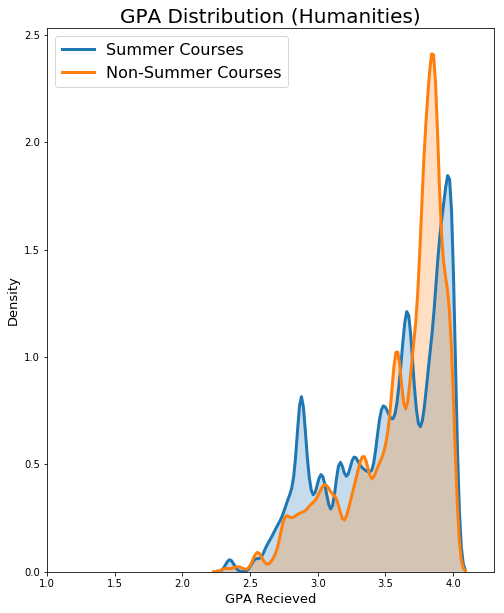

In [36]:
from analysis_modules import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig=plt.figure(figsize=(8, 10))
dtf = make_pandas('humanities.txt')
terms = ['S', 'NS']
for term in terms:
    sub = dtf[dtf['Summer?'] == term]
    if term == 'S':
        temp = 'Summer Courses'
    else:
        temp = 'Non-Summer Courses'
    
    sns.distplot(sub['GPA Recieved'], hist = False, norm_hist = True,
               kde_kws = {'shade':True, 'linewidth':3, 'bw': 0.03},
               label = temp)

plt.legend(prop={'size': 16})
plt.title('GPA Distribution (Humanities)',fontsize = 20)
plt.xlabel('GPA Recieved',fontsize=13)
plt.ylabel('Density',fontsize=13)
plt.xlim(1.0, 4.3)
plt.show()

Text(0.5,1,u'Side-by-Side Histogram of GPA Distribution')

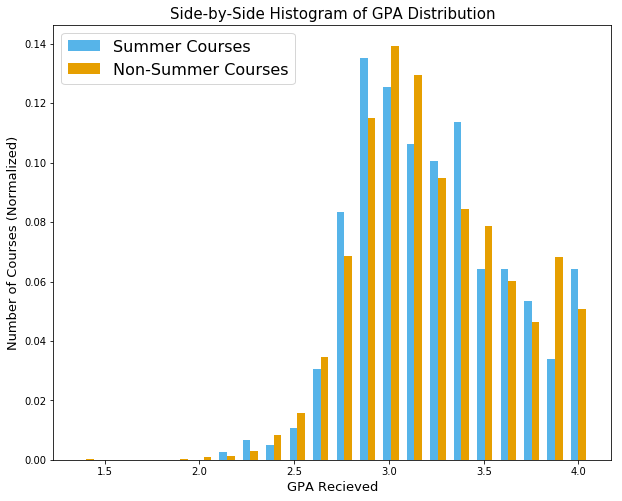

In [4]:
fig=plt.figure(figsize=(10, 8))

x1 = list(dtf[dtf['Summer?'] == 'S']['GPA Recieved'])
x2 = list(dtf[dtf['Summer?'] == 'NS']['GPA Recieved'])
weights = [np.ones_like(x1)/float(len(x1)), np.ones_like(x2)/float(len(x2))]

colors = ['#56B4E9', '#E69F00']
names = ['Summer Courses', 'Non-Summer Courses']

plt.hist([x1,x2], bins = 22, weights = weights, color = colors, label = names, align = 'right', rwidth = 0.65)

plt.legend(prop={'size': 16})
plt.xlabel('GPA Recieved',fontsize=13)
plt.ylabel('Number of Courses (Normalized)',fontsize=13)
plt.title('Side-by-Side Histogram of GPA Distribution',fontsize = 15)

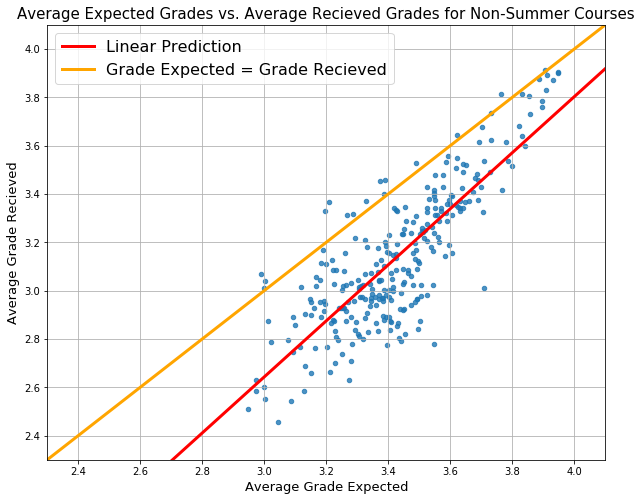

('slope:', 1.1597761578069803, 'intercept:', -0.8363981598296779, 'r_value:', 0.8211129913902699, 'p_value:', 1.2740696276729262e-71)


In [17]:
import scipy.stats as stats

summer = 'NS' #'S' or 'NS'
dtf = make_pandas('ucsd.txt')
dtf = dtf.dropna()
dtf = dtf.reset_index(drop=True)
names = dtf[dtf['Summer?'] == summer]['Course Name'].unique()
expected = []
recieved = []
for name in names:
    expected.append(dtf[(dtf['Course Name'] == name) & (dtf['Summer?'] == summer)]['GPA Expected'].mean())
    recieved.append(dtf[(dtf['Course Name'] == name) & (dtf['Summer?'] == summer)]['GPA Recieved'].mean())
GPA_dtf = pd.DataFrame({'Course Name': names, 'Avg. GPA Expected': expected, 'Avg. GPA Recieved': recieved})


slope, intercept, r_value, p_value, std_err = stats.linregress(GPA_dtf['Avg. GPA Expected'], GPA_dtf['Avg. GPA Recieved'])

values = [slope * i + intercept for i in [2.3, 4.2]]

fig=plt.figure(figsize=(10, 8))
plt.scatter(GPA_dtf['Avg. GPA Expected'], GPA_dtf['Avg. GPA Recieved'], s=20, alpha=0.8, label=None)
plt.plot([2.3, 4.2], values, 'b', c='red', label = 'Linear Prediction', linewidth=3)
plt.plot([2.3, 4.2], [2.3, 4.2], 'orange', label = 'Grade Expected = Grade Recieved',linewidth=3)
if summer == 'S':
    plt.title("Average Expected Grades vs. Average Recieved Grades for Summer Courses",fontsize = 15)
else:
    plt.title("Average Expected Grades vs. Average Recieved Grades for Non-Summer Courses",fontsize = 15)
plt.xlabel('Average Grade Expected',fontsize=13)
plt.ylabel('Average Grade Recieved',fontsize=13)
plt.xlim(2.3, 4.1)
plt.ylim(2.3, 4.1)
plt.legend(prop={'size': 16})
plt.grid()
plt.show()
print ("slope:", slope, "intercept:", intercept, "r_value:", r_value, "p_value:", p_value)

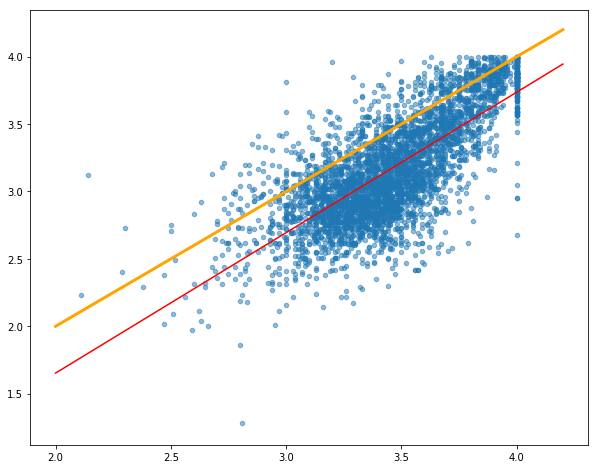

('slope:', 1.0418433890258354, 'intercept:', -0.4308835351997091, 'r_value:', 0.7524576965683913, 'p_value:', 0.0)


In [15]:
import scipy.stats as stats
dtf = make_pandas('ucsd.txt')
dtf = dtf.dropna()
dtf = dtf.reset_index(drop=True)
dtf = dtf[(dtf['Summer?'] == 'NS')]
slope, intercept, r_value, p_value, std_err = stats.linregress(dtf['GPA Expected'], dtf['GPA Recieved'])

abline_values = [slope * i + intercept for i in [2, 4.2]]

fig=plt.figure(figsize=(10, 8))
plt.plot([2, 4.2], [2, 4.2], 'orange', label = 'Grade Expected = Grade Recieved',linewidth=3)
plt.scatter(dtf['GPA Expected'], dtf['GPA Recieved'], s=20, alpha=0.5)
plt.plot([2, 4.2], abline_values, 'b', c='red')

plt.show()
print ("slope:", slope, "intercept:", intercept, "r_value:", r_value, "p_value:", p_value)